In [191]:
import numpy as np
import matplotlib.pyplot as plt

def sign(arr):
    result = np.zeros(arr.shape[0])
    for i in range(arr.shape[0]):
        if arr[i] >= 0:
            result[i] = 1
        else:
            result[i] = -1
    return result

# Exerice 3


## Question 1


We are interested in finding the best weights $w$ that minimizes the empirical risk $R_n(\theta)$ from set of observations $\{(x_i,y_i)\}_{i=1,...,n}$ by adjusting the value of $w$ in the opposite direction of the gradient :
$$R_n(w) = \frac{1}{n}\sum_{i=1}^n (y_i - w_i^T x_i)$$
$R_n$ is a sum over all the observations in our dataset. If the dataset is large, evaluating the gradient at each step become computationally expensive, the SGD addresses this step by approximating the gradient using a single sample (or a mini-batch) sampled randomly from the dataset.
After initializing the weights either randomly or deterministically, we repeat the following steps until a stopping criteria is verified :


1.   Randomly select a point $(x_i,y_i)$ from the dataset (or a mini-batch)
2.   Approximate the gradient by :    
      $$∇R_n(w) = -2 x_i (y_i - w^T x_i)$$
3.   We update the weights by substracting $-lr \cdot ∇R_n(w)$





In [192]:
def stochastic_gradient(x,y,n_iter,lr,eps) :
  n_samples, n_features = x.shape
  w = np.zeros(n_features)
  dw = np.inf
  i = 0
  while i < n_iter and np.linalg.norm(dw) > eps :
    i += 1
    idx = np.random.randint(n_samples)
    xi = x[idx]
    yi = y[idx]
    dw = -2 * (yi - w.dot(xi))*xi
    w = w - lr * dw
  return w

## Question 2


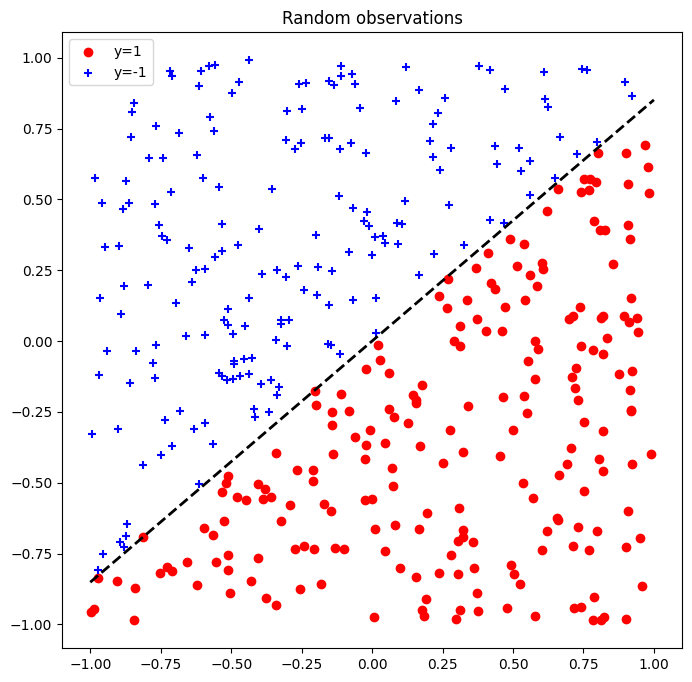

In [229]:
n_obs = 400
x = np.random.uniform(-1,1,size=(n_obs,2))
w_bar = np.random.normal(size=2)
y = sign(x.dot(w_bar))
z = [(x, y) for x, y in zip(x, y)]


plt.figure(figsize=(8, 8))
plt.scatter(x[y==1][:,0],x[y==1][:,1],c='r',marker='o',label='y=1')
plt.scatter(x[y==-1][:,0],x[y==-1][:,1],c='b',marker='+',label='y=-1')
slope = -w_bar[0] / w_bar[1]
intercept = 0
x_vals = np.array([-1, 1])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, 'k--', linewidth=2)
plt.title("Random observations")
plt.legend()

## Question 3

In [230]:
w_star = stochastic_gradient(x,y,n_iter=10000,lr=1e-2,eps=1e-10)
w_star

array([ 0.81793701, -1.18557116])

In [231]:
np.linalg.norm(w_bar-w_star)

0.1976201858354548

Text(0.5, 1.0, 'Random observations')

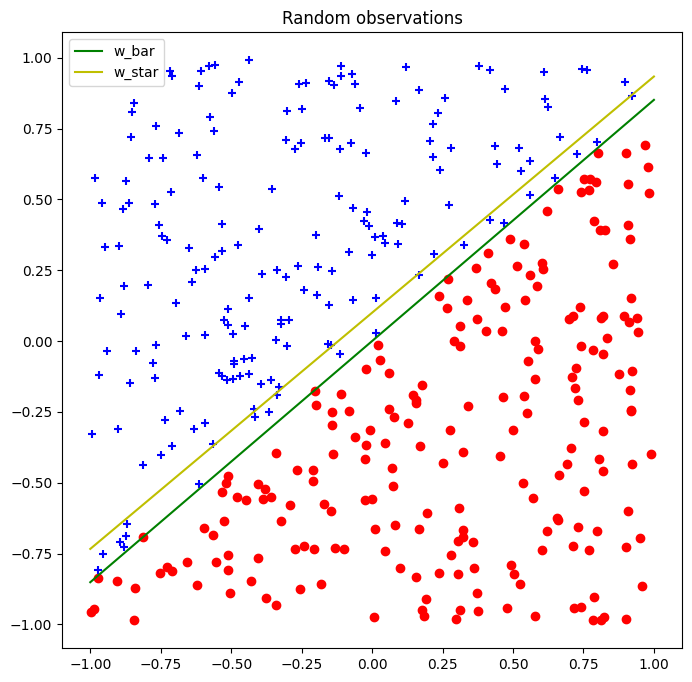

In [232]:
w_star = stochastic_gradient(x,y,n_iter=10000,lr=1e-3,eps=1e-10)
plt.figure(figsize=(8, 8))
plt.scatter(x[y==1][:,0],x[y==1][:,1],c='r',marker='o')
plt.scatter(x[y==-1][:,0],x[y==-1][:,1],c='b',marker='+')
slope = -w_bar[0] / w_bar[1]
intercept = 0
slope2 = -w_star[0] / w_star[1]
x_vals = np.array([-1, 1])
y_vals = slope * x_vals + intercept
y_stars =  slope2 * x_vals + intercept + 0.1
plt.plot(x_vals, y_vals,c='g',label = 'w_bar')
plt.plot(x_vals, y_stars,c='y',label = 'w_star')
plt.legend()
plt.title("Random observations")


We remark that our predicted vector $w^*$ is pretty close to the true value $\bar{w}$

## Question 4

In [233]:
sigma_noise = 1
noise = np.random.normal(0,sigma_noise,size=(n_obs,2))
x_noisy = x + noise
y_noisy = sign(x_noisy.dot(w_bar))
w_star = stochastic_gradient(x_noisy,y,n_iter=10000,lr=1e-3,eps=1e-10)
w_star

array([ 0.1812184 , -0.31771193])

In [234]:
np.linalg.norm(w_bar-w_star)

0.9423030828027832

Text(0.5, 1.0, 'Random observations')

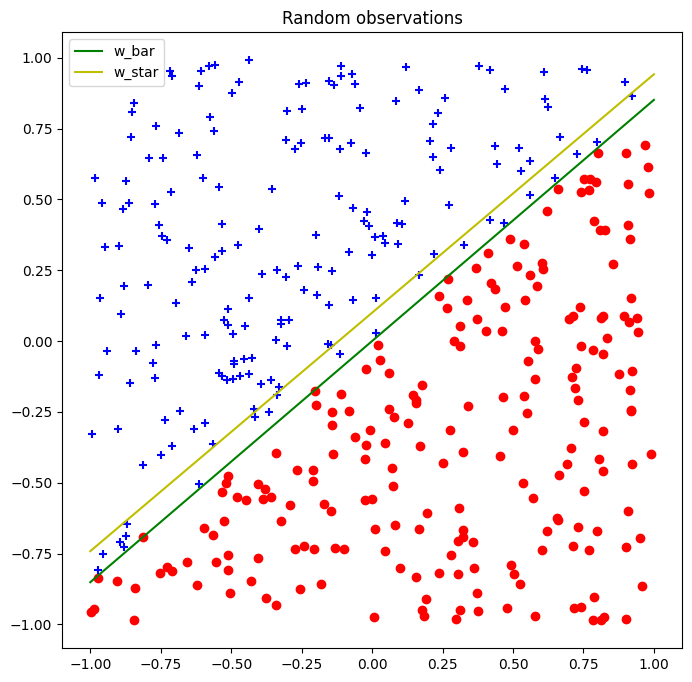

In [235]:
w_star = stochastic_gradient(x_noisy,y_noisy,n_iter=10000,lr=1e-3,eps=1e-10)
plt.figure(figsize=(8, 8))
plt.scatter(x[y==1][:,0],x[y==1][:,1],c='r',marker='o')
plt.scatter(x[y==-1][:,0],x[y==-1][:,1],c='b',marker='+')
slope = -w_bar[0] / w_bar[1]
intercept = 0
slope2 = -w_star[0] / w_star[1]
x_vals = np.array([-1, 1])
y_vals = slope * x_vals + intercept
y_stars =  slope2 * x_vals + intercept + 0.1
plt.plot(x_vals, y_vals,c='g',label = 'w_bar')
plt.plot(x_vals, y_stars,c='y',label = 'w_star')
plt.legend()
plt.title("Random observations")


The introduction of noise to our observations worsen the accuracy of our estimate of $w$.

## Question 5

In [114]:
pip install ucimlrepo

In [236]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features.values
mean = X.mean()
std = X.std()
X = (X - mean) / std
y_raw = breast_cancer_wisconsin_diagnostic.data.targets
y = np.zeros(y_raw.shape)
y[y_raw == 'M'] = 1
y[y_raw == 'B'] = -1
X.shape, y.shape

((569, 30), (569, 1))

In [237]:
train_size = 0.8
n_train = int(train_size * X.shape[0])
idx = np.random.permutation(X.shape[0])
X_train = X[idx[:n_train]]
y_train = y[idx[:n_train]]
X_test = X[idx[n_train:]]
y_test = y[idx[n_train:]]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(455, 30) (455, 1) (114, 30) (114, 1)


In [238]:
w_star = stochastic_gradient(X_train,y_train,n_iter=10000,lr=1e-3,eps=1e-10)
w_star

array([0.18328608, 0.20088852, 0.13053936, 0.04699432, 0.19903777,
       0.19980772, 0.20040689, 0.19969137, 0.19897416, 0.19894335,
       0.19884585, 0.19693305, 0.19684687, 0.0022798 , 0.19905647,
       0.19919988, 0.19925374, 0.1991104 , 0.19904489, 0.19906973,
       0.19437135, 0.22896949, 0.20293314, 0.25002995, 0.19922018,
       0.20206586, 0.20327051, 0.20031789, 0.19961951, 0.19920169])

In [239]:
y_pred = sign(np.dot(X_test,w_star))

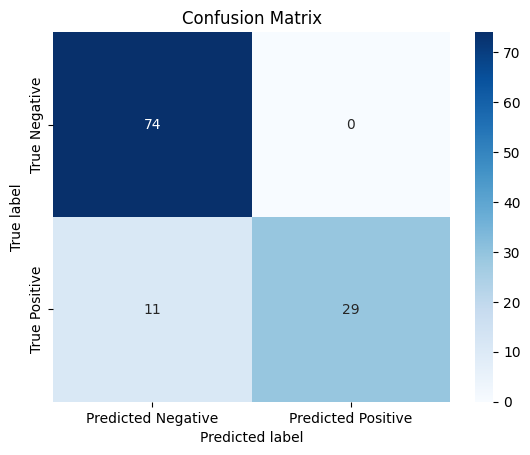

In [240]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [241]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 1.00
Recall: 0.72
F1 Score: 0.84


In [242]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


We observe that our model achieves a high precision of 90%, indicating strong performance on the dataset, with no false positives reported. However, a recall of 72% suggests that the model may be missing a significant proportion of positive cases, which is particularly concerning in the context of a breast cancer dataset. The model can be improved by computing gradient using batches instead of a single point.